In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


df = pd.read_excel(r"C:\Users\HP\Downloads\Case Study Data\Case Study Data\Prod Recommendation_ Data to share.xlsx")

df.head()

,Account ID,Product Type,Account Size,FISC_QTR_VAL,Rev
0,5221744109,P1,Medium Accounts,2015-Q4,2902.14828
1,9098103170,P2,2-Medium Accounts,2016-Q1,152.91162
2,2531901923,P3,Medium Accounts,2015-Q3,208.71378
3,7187620403,P4,Medium Accounts,2016-Q1,415.76436
4,1055842257,P5,2-Medium Accounts,2018-Q3,1.96596


## Data Preprocessing

In [2]:
# Mapping for Product Type
product_mapping = {
    'P1': 1, 'P2': 2, 'P3': 3, 'P4': 4, 'P5': 5, 'P6': 6, 'P7': 7, 'P8': 8, 'P9': 9, 'P10': 10,
    'P11': 11, 'P12': 12, 'P13': 13, 'P14': 14, 'P15': 15, 'P16': 16, 'P17': 17, 'P18': 18, 'P19': 19,
    'P20': 20, 'P21': 21, 'P22': 22, 'P23': 23, 'P24': 24, 'P25': 25, 'P26': 26, 'P27': 27, 'P28': 28,
    'P29': 29, 'P30': 30, 'P31': 31, 'P32': 32, 'P33': 33, 'P34': 34, 'P35': 35, 'P36': 36, 'P37': 37,
    'P38': 38, 'P39': 39, 'P40': 40, 'P41': 41, 'P42': 42, 'P43': 43, 'P44': 44, 'P45': 45, 'P46': 46,
    'P47': 47, 'P48': 48, 'P49': 49, 'P50': 50, 'P51': 51, 'P52': 52, 'P53': 53, 'P54': 54, 'P55': 55,
    'P56': 56, 'P57': 57, 'P58': 58, 'P59': 59, 'P60': 60, 'P61': 61, 'P62': 62, 'P63': 63, 'P64': 64,
    'P65': 65, 'P66': 66, 'P67': 67, 'P68': 68, 'P69': 69, 'P70': 70, 'P71': 71, 'P72': 72
}

# Apply mapping to DataFrame
df['Product Type'] = df['Product Type'].map(product_mapping)

df.head(20)




,Account ID,Product Type,Account Size,FISC_QTR_VAL,Rev
0,5221744109,1,Medium Accounts,2015-Q4,2902.14828
1,9098103170,2,2-Medium Accounts,2016-Q1,152.91162
2,2531901923,3,Medium Accounts,2015-Q3,208.71378
3,7187620403,4,Medium Accounts,2016-Q1,415.76436
4,1055842257,5,2-Medium Accounts,2018-Q3,1.96596
5,8816255437,6,5-Low Accounts,2019-Q3,2274.42186
6,6840579536,7,NaN,2016-Q2,11.95650
7,6611891073,5,2-Medium Accounts,2016-Q2,3.23946
8,9749672138,3,3-Medium Accounts,2015-Q2,29.08224
9,1526049124,8,3-Medium Accounts,2016-Q4,96.66000


In [3]:
# Summary statistics
print(df.describe())

         Account ID   Product Type           Rev
count  2.463650e+05  246365.000000  2.463650e+05
mean   4.978312e+09       8.688811  3.494060e+03
std    2.855152e+09       8.130429  4.622774e+04
min    1.416430e+05       1.000000 -3.911592e+05
25%    2.501337e+09       4.000000  1.333350e+01
50%    4.978650e+09       6.000000  2.097909e+02
75%    7.428410e+09      11.000000  1.252687e+03
max    9.998980e+09      72.000000  1.105487e+07


## DATA VISUVALIZATION

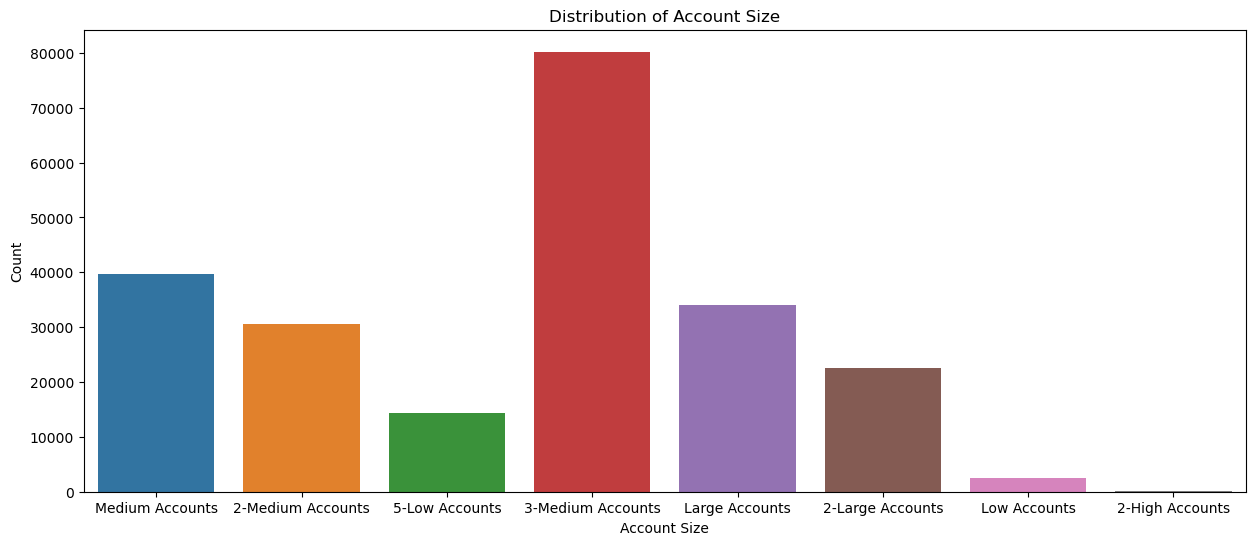

In [4]:
# Visualizing the distribution of Account Size
plt.figure(figsize=(15, 6))
sns.countplot(x='Account Size', data=df)
plt.title('Distribution of Account Size')
plt.xlabel('Account Size')
plt.ylabel('Count')
plt.show()

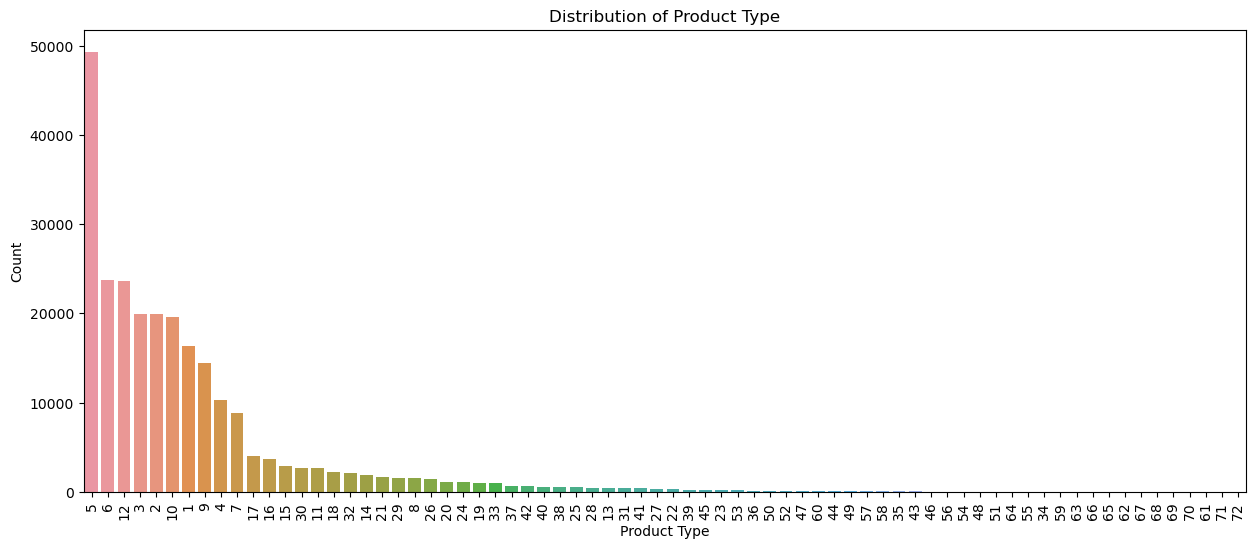

In [5]:
# Visualizing the distribution of Product Type
plt.figure(figsize=(15, 6))
sns.countplot(x='Product Type', data=df, order=df['Product Type'].value_counts().index)
plt.title('Distribution of Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<Figure size 1500x800 with 0 Axes>

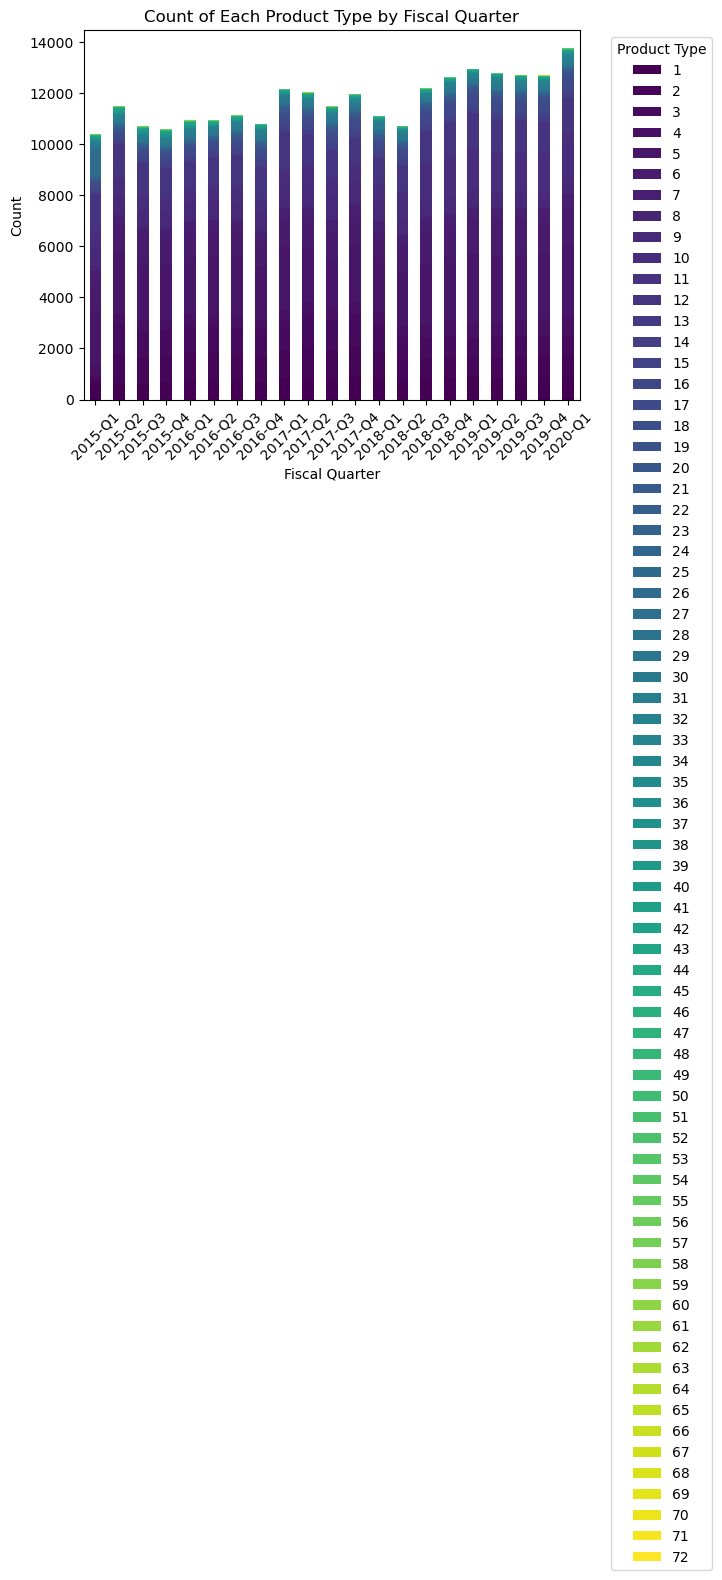

In [7]:
# Pivot the data to get counts of each product type for each fiscal quarter
pivot_df = df.pivot_table(index='FISC_QTR_VAL', columns='Product Type', aggfunc='size', fill_value=0)

# Plotting
plt.figure(figsize=(15, 8))
pivot_df.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Count of Each Product Type by Fiscal Quarter')
plt.xlabel('Fiscal Quarter')
plt.ylabel('Count')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


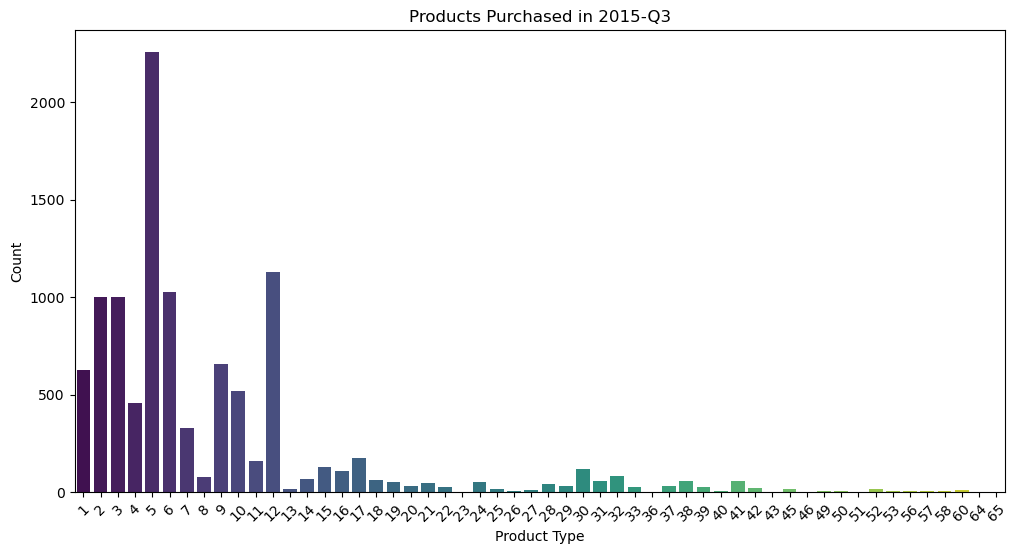

In [8]:
def plot_products_by_quarter(quarter):
    # Filter data for the specified quarter
    quarter_data = df[df['FISC_QTR_VAL'] == quarter]

    # Count the occurrences of each product type
    product_counts = quarter_data['Product Type'].value_counts()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')
    plt.title(f'Products Purchased in {quarter}')
    plt.xlabel('Product Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

quarter_input = '2015-Q3'  
plot_products_by_quarter(quarter_input)


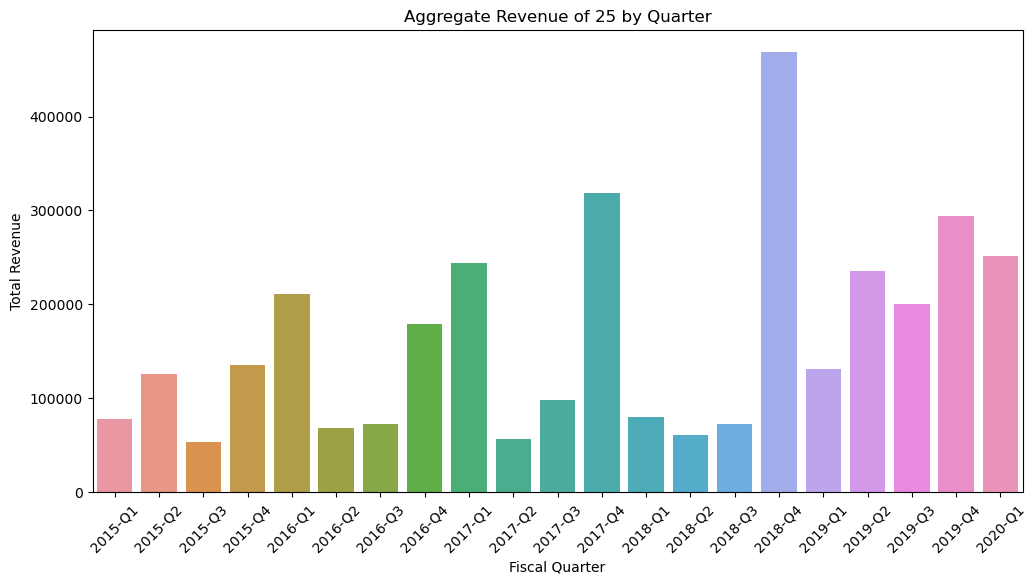

In [9]:
def aggregate_product_revenue_by_quarter(product_type):
    # Filter data for the specified product type
    product_data = df[df['Product Type'] == product_type]

    # Aggregate revenue by quarter
    revenue_by_quarter = product_data.groupby('FISC_QTR_VAL', as_index=False)['Rev'].sum()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='FISC_QTR_VAL', y='Rev', data=revenue_by_quarter)
    plt.title(f'Aggregate Revenue of {product_type} by Quarter')
    plt.xlabel('Fiscal Quarter')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

product_input = 25  
aggregate_product_revenue_by_quarter(product_input)


In [10]:
df['Rev'] = df['Rev'].abs()

df = df.dropna(subset = ['Account Size'])

df.shape

data = df

print(data)

        Account ID  Product Type       Account Size FISC_QTR_VAL         Rev
0       5221744109             1    Medium Accounts      2015-Q4  2902.14828
1       9098103170             2  2-Medium Accounts      2016-Q1   152.91162
2       2531901923             3    Medium Accounts      2015-Q3   208.71378
3       7187620403             4    Medium Accounts      2016-Q1   415.76436
4       1055842257             5  2-Medium Accounts      2018-Q3     1.96596
...            ...           ...                ...          ...         ...
246358   143319650             5  2-Medium Accounts      2015-Q4     0.71460
246360  1095101278             5  3-Medium Accounts      2017-Q3     6.64002
246361   757292597            15  3-Medium Accounts      2018-Q3     0.00000
246362  5718410593            39  2-Medium Accounts      2018-Q3     1.00314
246364  8896776494             9  3-Medium Accounts      2019-Q3     1.57752

[224194 rows x 5 columns]


In [11]:
 # Perform ordinal encoding for 'Account Size'
ordinal_encoder = OrdinalEncoder(categories=[['Low Accounts', '5-Low Accounts','Medium Accounts','2-Medium Accounts','3-Medium Accounts','2-High Accounts','Large Accounts' ,'2-Large Accounts']])
account_size_encoded = ordinal_encoder.fit_transform(data[['Account Size']])

In [12]:
data

,Account ID,Product Type,Account Size,FISC_QTR_VAL,Rev
0,5221744109,1,Medium Accounts,2015-Q4,2902.14828
1,9098103170,2,2-Medium Accounts,2016-Q1,152.91162
2,2531901923,3,Medium Accounts,2015-Q3,208.71378
3,7187620403,4,Medium Accounts,2016-Q1,415.76436
4,1055842257,5,2-Medium Accounts,2018-Q3,1.96596
...,...,...,...,...,...
246358,143319650,5,2-Medium Accounts,2015-Q4,0.71460
246360,1095101278,5,3-Medium Accounts,2017-Q3,6.64002
246361,757292597,15,3-Medium Accounts,2018-Q3,0.00000
246362,5718410593,39,2-Medium Accounts,2018-Q3,1.00314


## Code

In [13]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler



def findUserSimilarity(data):
    # Pivot the data to create a user-item matrix
    user_item_matrix = data.pivot_table(index='Account ID', columns=['Product Type', 'Account Size'], values='Rev', aggfunc='sum', fill_value=0)
    #print(user_item_matrix)
    #print(user_item_matrix.shape)
    # Standardize the matrix to normalize the data
    scaler = StandardScaler()
    user_item_matrix_scaled = scaler.fit_transform(user_item_matrix)

    # Compute cosine similarity between users
    user_similarity = cosine_similarity(user_item_matrix_scaled)
    
    return user_similarity

## Model 1
### Excluding the Purchase History of the given user

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def top_recommended_pr(account_id, account_size, qtr, data, top_n=3):
    fisc_qtr = str(qtr)
    
    data['FISC_QTR_VAL'] = data['FISC_QTR_VAL'].astype(str)

    fdata = data[data['FISC_QTR_VAL'].apply(lambda x: x[-1]) == fisc_qtr[-1]]
    user_similarity = findUserSimilarity(fdata)
    user_product_spending = fdata.groupby(['Account ID', 'Product Type'])['Rev'].sum().unstack(fill_value=0)
    
    if account_id not in user_product_spending.index:
        # Filter data based on account size
        fdata_account_size = fdata[fdata['Account Size'] == account_size]

        # If no data available for the given account size, return empty list
        if len(fdata_account_size) == 0:
            return []

        # Calculate user similarity based on account size
        user_similarity = findUserSimilarity(fdata_account_size)
        
        user_product_spending = fdata_account_size.groupby(['Account ID', 'Product Type'])['Rev'].sum().unstack(fill_value=0)

        similarity_scores = cosine_similarity(user_product_spending)

        most_similar_indices = similarity_scores.argsort(axis=1)[:, -101:-1]
        
        similar_users_spending = user_product_spending.iloc[most_similar_indices.flatten()]

        mean_spending_profile = similar_users_spending.mean()
        
        top_recommended_products = mean_spending_profile.sort_values(ascending=False)[:top_n]
        return top_recommended_products.index.tolist()

    index = user_product_spending.index.get_loc(account_id)
    

    similarity_scores = user_similarity[index]

    most_similar_indices = similarity_scores.argsort()[-101:-1]

    most_similar_indices = most_similar_indices[most_similar_indices != index]

    similar_users_spending = user_product_spending.iloc[most_similar_indices]

    mean_spending_profile = similar_users_spending.mean()

    user_spending_profile = user_product_spending.iloc[index]
    mean_spending_profile = mean_spending_profile.drop(user_spending_profile[user_spending_profile != 0].index)

    # Sort the mean spending profile to find the top recommended products
    top_recommended_products = mean_spending_profile.sort_values(ascending=False)[:top_n]

    return top_recommended_products.index.tolist()


In [15]:
account_id = 5221744109
account_size = 'Medium Accounts'
fisc_qtr = "2023-Q3"
user_product_spending = data.groupby(['Account ID', 'Product Type'])['Rev'].sum().unstack(fill_value=0)
top_products = top_recommended_pr(account_id, account_size,fisc_qtr,data)
print(f"Top recommended products for Account ID {account_id} with account size {account_size}:")
for i, product in enumerate(top_products, 1):
    print(f"  {i}. {product}")

Top recommended products for Account ID 5221744109 with account size Medium Accounts:
  1. 7
  2. 29
  3. 8


## Model 2
### Including Past Purchase History of given User

In [18]:
def customer_spending_summary(account_id):
    # Filter data for the given account ID
    customer_data = data[data['Account ID'] == account_id]

    # Group by Product Type and sum revenue
    spending_summary = customer_data.groupby('Product Type')['Rev'].sum().reset_index()
    
    spending_summary = spending_summary.sort_values(by='Rev', ascending=False)

    return spending_summary



In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def top_recommended_pr_past(account_id, account_size, qtr, data, top_n=3):
    fisc_qtr = str(qtr)
    
    data['FISC_QTR_VAL'] = data['FISC_QTR_VAL'].astype(str)

    fdata = data[data['FISC_QTR_VAL'].apply(lambda x: x[-1]) == fisc_qtr[-1]]
    user_similarity = findUserSimilarity(fdata)
    user_product_spending = fdata.groupby(['Account ID', 'Product Type'])['Rev'].sum().unstack(fill_value=0)
    
    if account_id not in user_product_spending.index:
        # Filter data based on account size
        fdata_account_size = fdata[fdata['Account Size'] == account_size]

        # If no data available for the given account size, return empty list
        if len(fdata_account_size) == 0:
            return []

        # Calculate user similarity based on account size
        user_similarity = findUserSimilarity(fdata_account_size)
        
        user_product_spending = fdata_account_size.groupby(['Account ID', 'Product Type'])['Rev'].sum().unstack(fill_value=0)

        similarity_scores = cosine_similarity(user_product_spending)

        most_similar_indices = similarity_scores.argsort(axis=1)[:, -101:-1]
        
        similar_users_spending = user_product_spending.iloc[most_similar_indices.flatten()]

        mean_spending_profile = similar_users_spending.mean()
        
        top_recommended_products = mean_spending_profile.sort_values(ascending=False)[:top_n]
        return top_recommended_products.index.tolist()

    index = user_product_spending.index.get_loc(account_id)
    
    prd_summary = customer_spending_summary(account_id)
    prd_list = prd_summary['Product Type'].tolist()
    
    if len(prd_list) >= 3:
        return prd_list[:top_n]
    else:
        n = len(prd_list)

        similarity_scores = user_similarity[index]

        most_similar_indices = similarity_scores.argsort()[-101:-1]

        most_similar_indices = most_similar_indices[most_similar_indices != index]

        similar_users_spending = user_product_spending.iloc[most_similar_indices]

        mean_spending_profile = similar_users_spending.mean()

        # Sort the mean spending profile to find the top recommended products
        top_recommended_products = mean_spending_profile.sort_values(ascending=False)[:top_n - n]
        prd_list.extend(top_recommended_products.index)

        return prd_list


In [20]:
account_id = 5221744109
account_size = 'Medium Accounts'
fisc_qtr = "2023-Q3"
top_products = top_recommended_pr_past(account_id, account_size,fisc_qtr, data)
print(f"Top recommended products for Account ID {account_id} with account size {account_size}:")
for i, product in enumerate(top_products, 1):
    print(f"  {i}. {product}")


Top recommended products for Account ID 5221744109 with account size Medium Accounts:
  1. 12
  2. 6
  3. 4


In [21]:
account_id = 5221744109
spending_summary = customer_spending_summary(account_id)
print("Customer Spending Summary:")
print(spending_summary)


Customer Spending Summary:
    Product Type           Rev
11            12  119783.00070
5              6   52839.90738
3              4   42818.53950
9             10   13055.75820
0              1   10463.42286
1              2    3660.89202
13            17    2917.55754
4              5    2444.92164
6              7    1987.43580
12            16    1725.72228
10            11     764.04024
7              8     745.13322
2              3     425.87478
14            26     187.41420
8              9      53.58222
